<a href="https://colab.research.google.com/github/fatimazohrahadaji/dataTNI/blob/main/DDOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# 1. Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [35]:
# 2. Chargement du fichier CSV
df = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [36]:
# 3. Affichage des premières lignes
print("Aperçu des données :")
print(df.head())

Aperçu des données :
    Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3                          

In [37]:
# 4. Nettoyage des données
# Suppression des colonnes inutiles ou contenant trop de valeurs nulles
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [38]:
# Supprimer les espaces dans les noms de colonnes
df.columns = df.columns.str.strip()

# Vérifier si la colonne 'Label' existe maintenant
print("Colonnes disponibles :")
print(df.columns.tolist())

Colonnes disponibles :
['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag 

In [39]:
# 5. Encodage de la colonne 'Label' (normal vs attaque)
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

In [40]:
# 6. Séparation des variables X (features) et y (target)
X = df.drop(['Label'], axis=1)
y = df['Label']

In [41]:
# Conversion en numérique (au cas où certaines colonnes sont object)
X = X.apply(pd.to_numeric, errors='coerce')
X.dropna(inplace=True)

X = les caractéristiques (features) du modèle.

y = les étiquettes (labels) à prédire.


In [42]:
# Adapter y à X
y = y.loc[X.index]

In [43]:
# 7. Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# 8. Entraînement du modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
# 9. Prédictions
y_pred = model.predict(X_test)


Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29321
           1       1.00      1.00      1.00     38393

    accuracy                           1.00     67714
   macro avg       1.00      1.00      1.00     67714
weighted avg       1.00      1.00      1.00     67714


Matrice de confusion :


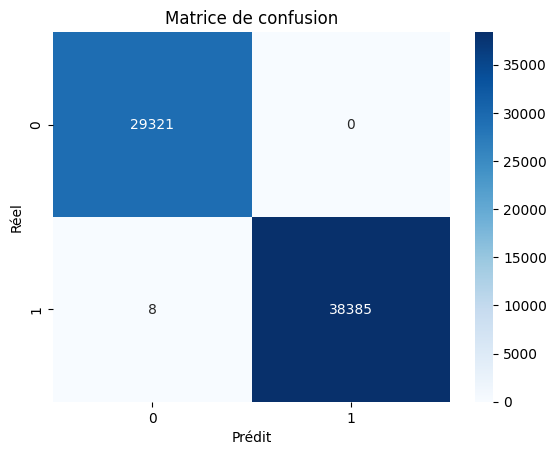

In [46]:
# 10. Évaluation
print("\nClassification Report :")
print(classification_report(y_test, y_pred))

print("\nMatrice de confusion :")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

In [47]:
# 11. Rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Rapport de classification :
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     29321
        DDoS       1.00      1.00      1.00     38393

    accuracy                           1.00     67714
   macro avg       1.00      1.00      1.00     67714
weighted avg       1.00      1.00      1.00     67714



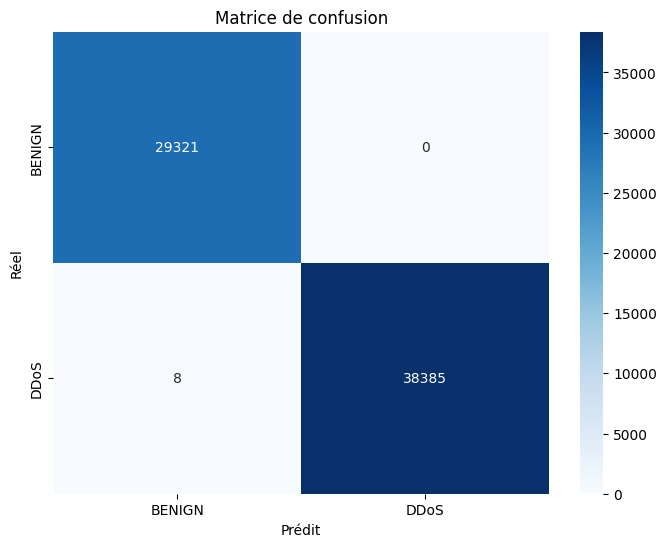

In [48]:
# 12. Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

In [49]:
# Assurez-vous que la colonne 'Label' est bien nettoyée
df = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df.columns = df.columns.str.strip()

In [50]:
# Afficher les valeurs uniques dans 'Label'
print("Labels uniques :", df['Label'].unique())

Labels uniques : ['BENIGN' 'DDoS']


In [51]:
# Filtrer uniquement les données infectées par DDoS
ddos_data = df[df['Label'] == 'DDoS']

In [52]:
# Affichage des premières lignes DDoS
print("Aperçu des données DDoS :")
print(ddos_data.head())

Aperçu des données DDoS :
       Destination Port  Flow Duration  Total Fwd Packets  \
18883                80        1293792                  3   
18884                80        4421382                  4   
18885                80        1083538                  3   
18886                80       80034360                  8   
18887                80         642654                  3   

       Total Backward Packets  Total Length of Fwd Packets  \
18883                       7                           26   
18884                       0                           24   
18885                       6                           26   
18886                       4                           56   
18887                       6                           26   

       Total Length of Bwd Packets  Fwd Packet Length Max  \
18883                        11607                     20   
18884                            0                      6   
18885                        11601                 

In [53]:
# Nombre total d'enregistrements DDoS
print("Nombre d'attaques DDoS détectées :", len(ddos_data))

#  sauvegarder les données DDoS dans un nouveau CSV
ddos_data.to_csv("DDoS_only.csv", index=False)

Nombre d'attaques DDoS détectées : 128027


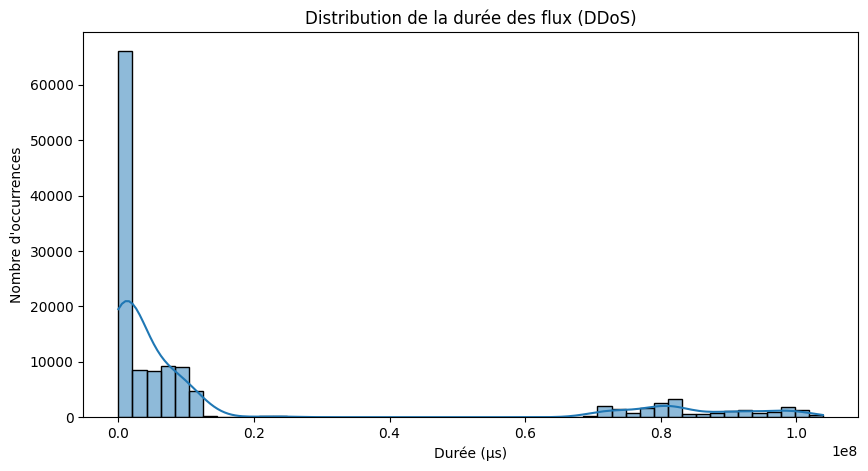

In [54]:
# Supprimer les espaces dans les noms de colonnes
ddos_data.columns = ddos_data.columns.str.strip()

# Visualisation de la durée des flux
plt.figure(figsize=(10, 5))
sns.histplot(ddos_data['Flow Duration'], bins=50, kde=True)
plt.title("Distribution de la durée des flux (DDoS)")
plt.xlabel("Durée (µs)")
plt.ylabel("Nombre d'occurrences")
plt.show()

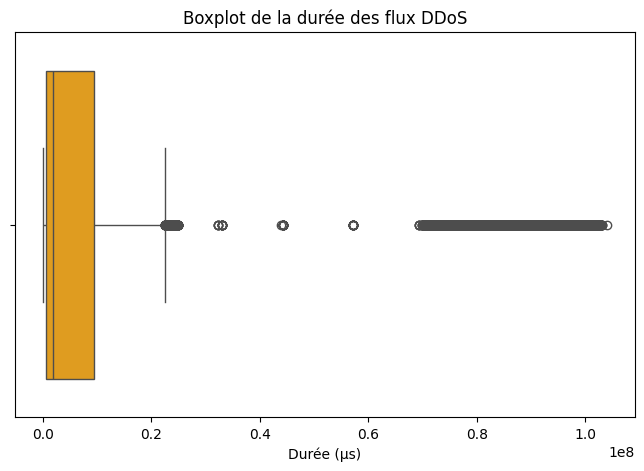

In [55]:
# Boîte à moustaches (Boxplot) — Durée des flux
plt.figure(figsize=(8, 5))
sns.boxplot(x=ddos_data['Flow Duration'], color='orange')
plt.title("Boxplot de la durée des flux DDoS")
plt.xlabel("Durée (µs)")
plt.show()

Corrélation entre les variables (extraites)


In [56]:
# Étape 1 : Nettoyage des noms de colonnes
ddos_data.columns = ddos_data.columns.str.strip()

# Étape 2 : Liste des colonnes d’intérêt: Sélection de quelques colonnes numériques pertinentes
features = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
            'Flow Bytes/s', 'Flow Packets/s']

In [57]:
# Étape 3 : Extraction, conversion, suppression des lignes vides
subset = ddos_data[features].copy()
subset = subset.apply(pd.to_numeric, errors='coerce')
subset.dropna(inplace=True)

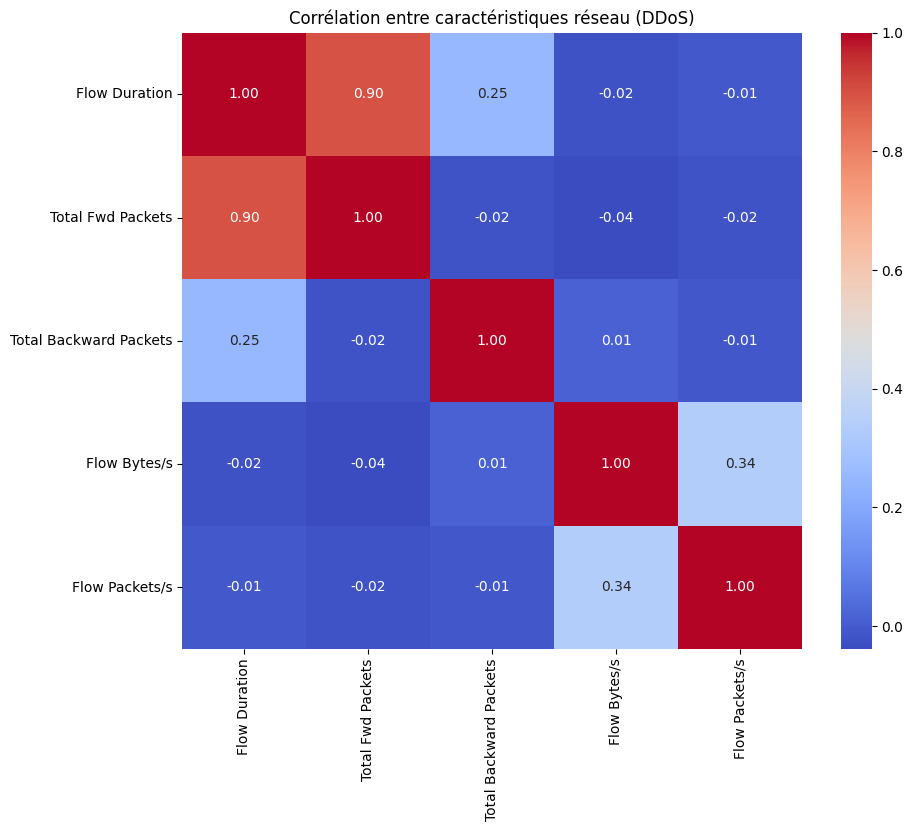

In [58]:
# Étape 4 : Visualisation de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(subset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre caractéristiques réseau (DDoS)")
plt.show()

<Axes: xlabel='Label', ylabel='Flow Duration'>

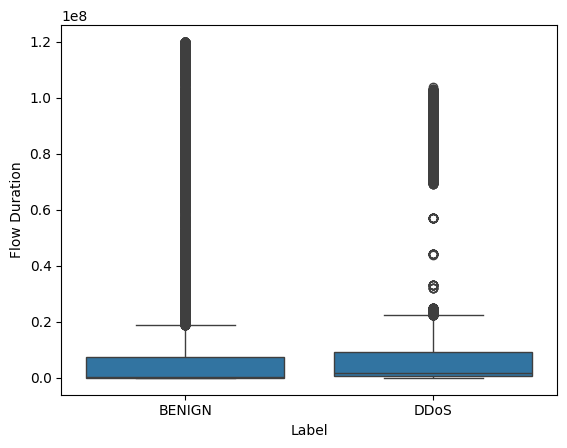

In [59]:
# Exploration & Visualisation des comportements malveillants
# Comparer la durée des flux entre DDoS et BENIGN
sns.boxplot(x=df['Label'], y=df['Flow Duration'])


<Axes: xlabel='Total Fwd Packets', ylabel='Density'>

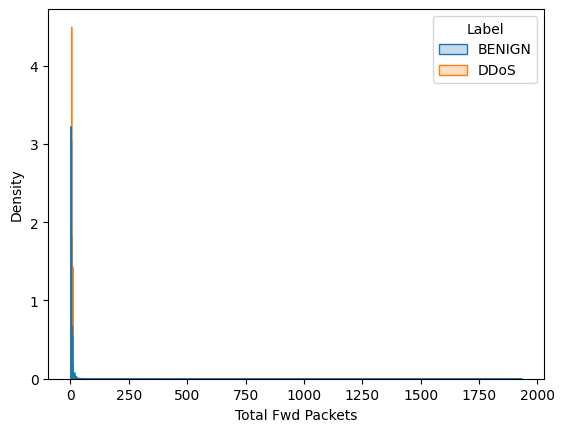

In [60]:
# Distribution du nombre de paquets
sns.histplot(data=df, x='Total Fwd Packets', hue='Label', element='step', stat='density', common_norm=False)

Analyse des comportements via les features importantes

In [61]:
# Importance des variables
importances = model.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)[-10:]

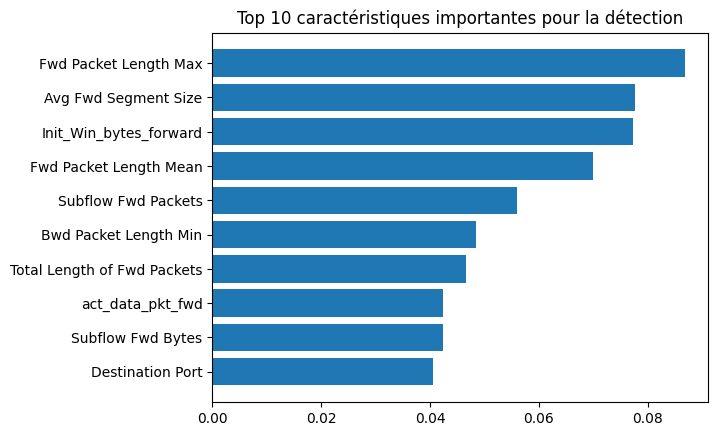

In [62]:
# Top 10 caractéristiques qui permettent d’identifier une attaque
plt.barh(range(10), importances[sorted_idx])
plt.yticks(range(10), features[sorted_idx])
plt.title("Top 10 caractéristiques importantes pour la détection")
plt.show()

Exemple : un nombre très élevé de paquets envoyés en très peu de temps peut indiquer un DDoS, alors qu’un flux normal est beaucoup plus équilibré.

              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     29321
        DDoS       1.00      1.00      1.00     38393

    accuracy                           1.00     67714
   macro avg       1.00      1.00      1.00     67714
weighted avg       1.00      1.00      1.00     67714



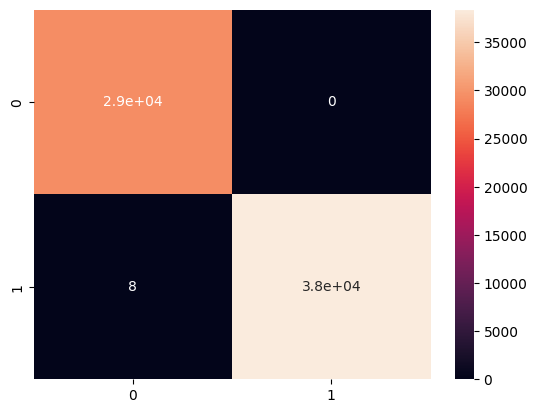

In [63]:
# Évaluation du modèle
# Matrice de confusion
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

# Rapport de classification
print(classification_report(y_test, y_pred, target_names=le.classes_))

In [64]:
# Création du tableau résumé sous forme de DataFrame
comportements = {
    "Comportement Réseau": [
        "Durée des flux très courte",
        "Très grand nombre de paquets envoyés",
        "Débit de flux très élevé",
        "Utilisation massive du protocole UDP ou TCP",
        "Flux très nombreux en peu de temps",
        "Très peu de paquets en retour",
        "Flux initiés vers de nombreux ports"
    ],
    "Type d'attaque potentiel": [
        "DDoS",
        "DDoS",
        "DDoS / Exfiltration",
        "DDoS / Scan",
        "DDoS / Botnet",
        "Scan / Flood",
        "Scan de port / Botnet"
    ],
    "Caractéristiques détectables dans les données": [
        "`Flow Duration` faible",
        "`Total Fwd Packets` élevé",
        "`Flow Bytes/s` très élevé",
        "`Protocol` UDP ou TCP (valeurs dominantes)",
        "`Timestamp` groupés (densité élevée)",
        "`Total Backward Packets` faible ou 0",
        "`Destination Port` très variable"
    ]
}

In [65]:
# Convertir en DataFrame
df_comportements = pd.DataFrame(comportements)

In [66]:
# Affichage dans Colab
display(Markdown("### 📊 Tableau résumé des comportements réseau associés aux attaques"))
display(df_comportements)

### 📊 Tableau résumé des comportements réseau associés aux attaques

,Comportement Réseau,Type d'attaque potentiel,Caractéristiques détectables dans les données
0,Durée des flux très courte,DDoS,`Flow Duration` faible
1,Très grand nombre de paquets envoyés,DDoS,`Total Fwd Packets` élevé
2,Débit de flux très élevé,DDoS / Exfiltration,`Flow Bytes/s` très élevé
3,Utilisation massive du protocole UDP ou TCP,DDoS / Scan,`Protocol` UDP ou TCP (valeurs dominantes)
4,Flux très nombreux en peu de temps,DDoS / Botnet,`Timestamp` groupés (densité élevée)
5,Très peu de paquets en retour,Scan / Flood,`Total Backward Packets` faible ou 0
6,Flux initiés vers de nombreux ports,Scan de port / Botnet,`Destination Port` très variable
